# init

In [ ]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

# runge kutta 4 for 2 equation 

In [ ]:
def X1(x1, x2, y1, y2, z1, z2, t):
  return -w1*y1-z1+k*(x2-x1)

def Y1(x1, x2, y1, y2, z1, z2, t):
  return w1*y1+0.165*y1

def Z1(x1, x2, y1, y2, z1, z2, t):
  return 0.2+z1*(x1-10.0)

def X2(x1, x2, y1, y2, z1, z2, t):
  return -w2*y2-z2+k*(x1-x2)

def Y2(x1, x2, y1, y2, z1, z2, t):
  return w2*y2+0.165*y2

def Z2(x1, x2, y1, y2, z1, z2, t):
  return 0.2+z2*(x2-10.0)

def next_x(x, i, h):
  t=float(i*h)
  kx1=h*X1(x[0], x[1], x[2], x[3], x[4], x[5], t)
  ky1=h*Y1(x[0], x[1], x[2], x[3], x[4], x[5], t)
  kz1=h*Z1(x[0], x[1], x[2], x[3], x[4], x[5], t)
  lx1=h*X2(x[0], x[1], x[2], x[3], x[4], x[5], t)
  ly1=h*Y2(x[0], x[1], x[2], x[3], x[4], x[5], t)
  lz1=h*Z2(x[0], x[1], x[2], x[3], x[4], x[5], t)

  kx2=h*X1(x[0]+kx1/2, x[1]+lx1/2, x[2]+ky1/2, x[3]+ly1/2, x[4]+kz1/2, x[5]+lz1/2, t+h/2)
  ky2=h*Y1(x[0]+kx1/2, x[1]+lx1/2, x[2]+ky1/2, x[3]+ly1/2, x[4]+kz1/2, x[5]+lz1/2, t+h/2)
  kz2=h*Z1(x[0]+kx1/2, x[1]+lx1/2, x[2]+ky1/2, x[3]+ly1/2, x[4]+kz1/2, x[5]+lz1/2, t+h/2)
  lx2=h*X2(x[0]+kx1/2, x[1]+lx1/2, x[2]+ky1/2, x[3]+ly1/2, x[4]+kz1/2, x[5]+lz1/2, t+h/2)
  ly2=h*Y2(x[0]+kx1/2, x[1]+lx1/2, x[2]+ky1/2, x[3]+ly1/2, x[4]+kz1/2, x[5]+lz1/2, t+h/2)
  lz2=h*Z2(x[0]+kx1/2, x[1]+lx1/2, x[2]+ky1/2, x[3]+ly1/2, x[4]+kz1/2, x[5]+lz1/2, t+h/2)

  kx3=h*X1(x[0]+kx2/2, x[1]+lx2/2, x[2]+ky2/2, x[3]+ly2/2, x[4]+kz2/2, x[5]+lz2/2, t+h/2)
  ky3=h*Y1(x[0]+kx2/2, x[1]+lx2/2, x[2]+ky2/2, x[3]+ly2/2, x[4]+kz2/2, x[5]+lz2/2, t+h/2)
  kz3=h*Z1(x[0]+kx2/2, x[1]+lx2/2, x[2]+ky2/2, x[3]+ly2/2, x[4]+kz2/2, x[5]+lz2/2, t+h/2)
  lx3=h*X2(x[0]+kx2/2, x[1]+lx2/2, x[2]+ky2/2, x[3]+ly2/2, x[4]+kz2/2, x[5]+lz2/2, t+h/2)
  ly3=h*Y2(x[0]+kx2/2, x[1]+lx2/2, x[2]+ky2/2, x[3]+ly2/2, x[4]+kz2/2, x[5]+lz2/2, t+h/2)
  lz3=h*Z2(x[0]+kx2/2, x[1]+lx2/2, x[2]+ky2/2, x[3]+ly2/2, x[4]+kz2/2, x[5]+lz2/2, t+h/2)

  kx4=h*X1(x[0]+kx3, x[1]+lx3, x[2]+ky3, x[3]+ly3, x[4]+kz3, x[5]+lz3, t+h)
  ky4=h*Y1(x[0]+kx3, x[1]+lx3, x[2]+ky3, x[3]+ly3, x[4]+kz3, x[5]+lz3, t+h)
  kz4=h*Z1(x[0]+kx3, x[1]+lx3, x[2]+ky3, x[3]+ly3, x[4]+kz3, x[5]+lz3, t+h)
  lx4=h*X2(x[0]+kx3, x[1]+lx3, x[2]+ky3, x[3]+ly3, x[4]+kz3, x[5]+lz3, t+h)
  ly4=h*Y2(x[0]+kx3, x[1]+lx3, x[2]+ky3, x[3]+ly3, x[4]+kz3, x[5]+lz3, t+h)
  lz4=h*Z2(x[0]+kx3, x[1]+lx3, x[2]+ky3, x[3]+ly3, x[4]+kz3, x[5]+lz3, t+h)

  return x+np.array([kx1+2*kx2+2*kx3+kx4, lx1+2*lx2+2*lx3+lx4, ky1+2*ky2+2*ky3+ky4,
                     ly1+2*ly2+2*ly3+ly4, kz1+2*kz2+2*kz3+kz4, lz1+2*lz2+2*lz3+lz4])/6.0


# ex

In [2]:
L=6 #no. of sites
np.random.seed(1010)
#ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
ic = np.array([-0.4, 0.8, 0.6, -2.0, 5.8, -4.0])
dt=0.001 #one discrete time step

nTransients = 0   # The iterates we'll throw away
nSteps = 7000       # This sets how many time steps will be described

w1=0.99
w2=0.95
k=0.3

P1 = float(2**8) # accuracy
P2 = float(2**12)

#縦 site, 横 time(step)
states = np.empty((nSteps, L))

for i in range(nTransients):
  ic=next_x(ic, i, dt)

states[0]=ic
class_numsP1=[]
class_numsP2=[]
for i in range(nSteps-1):
  states[i+1]=next_x(states[i], i + nTransients, dt)
  #print(i) i=7000を超えたある時発散する.
  #clusteringP1
  clustering_list = list(map(lambda x: float(int(x*P1))/P1, states[i])) 
  num=len(list(set(clustering_list)) )
  class_numsP1.append(num)

  #clusteringP2
  clustering_list = list(map(lambda x: float(int(x*P2))/P2, states[i])) 
  num=len(list(set(clustering_list)) )
  class_numsP2.append(num)

#最後だけ追加P1
clustering_list = list(map(lambda x: float(int(x*P1))/P1, states[nSteps-1])) 
num=len(list(set(clustering_list)) )
class_numsP1.append(num)

#最後だけ追加P2
clustering_list = list(map(lambda x: float(int(x*P2))/P2, states[nSteps-1])) 
num=len(list(set(clustering_list)) )
class_numsP2.append(num)


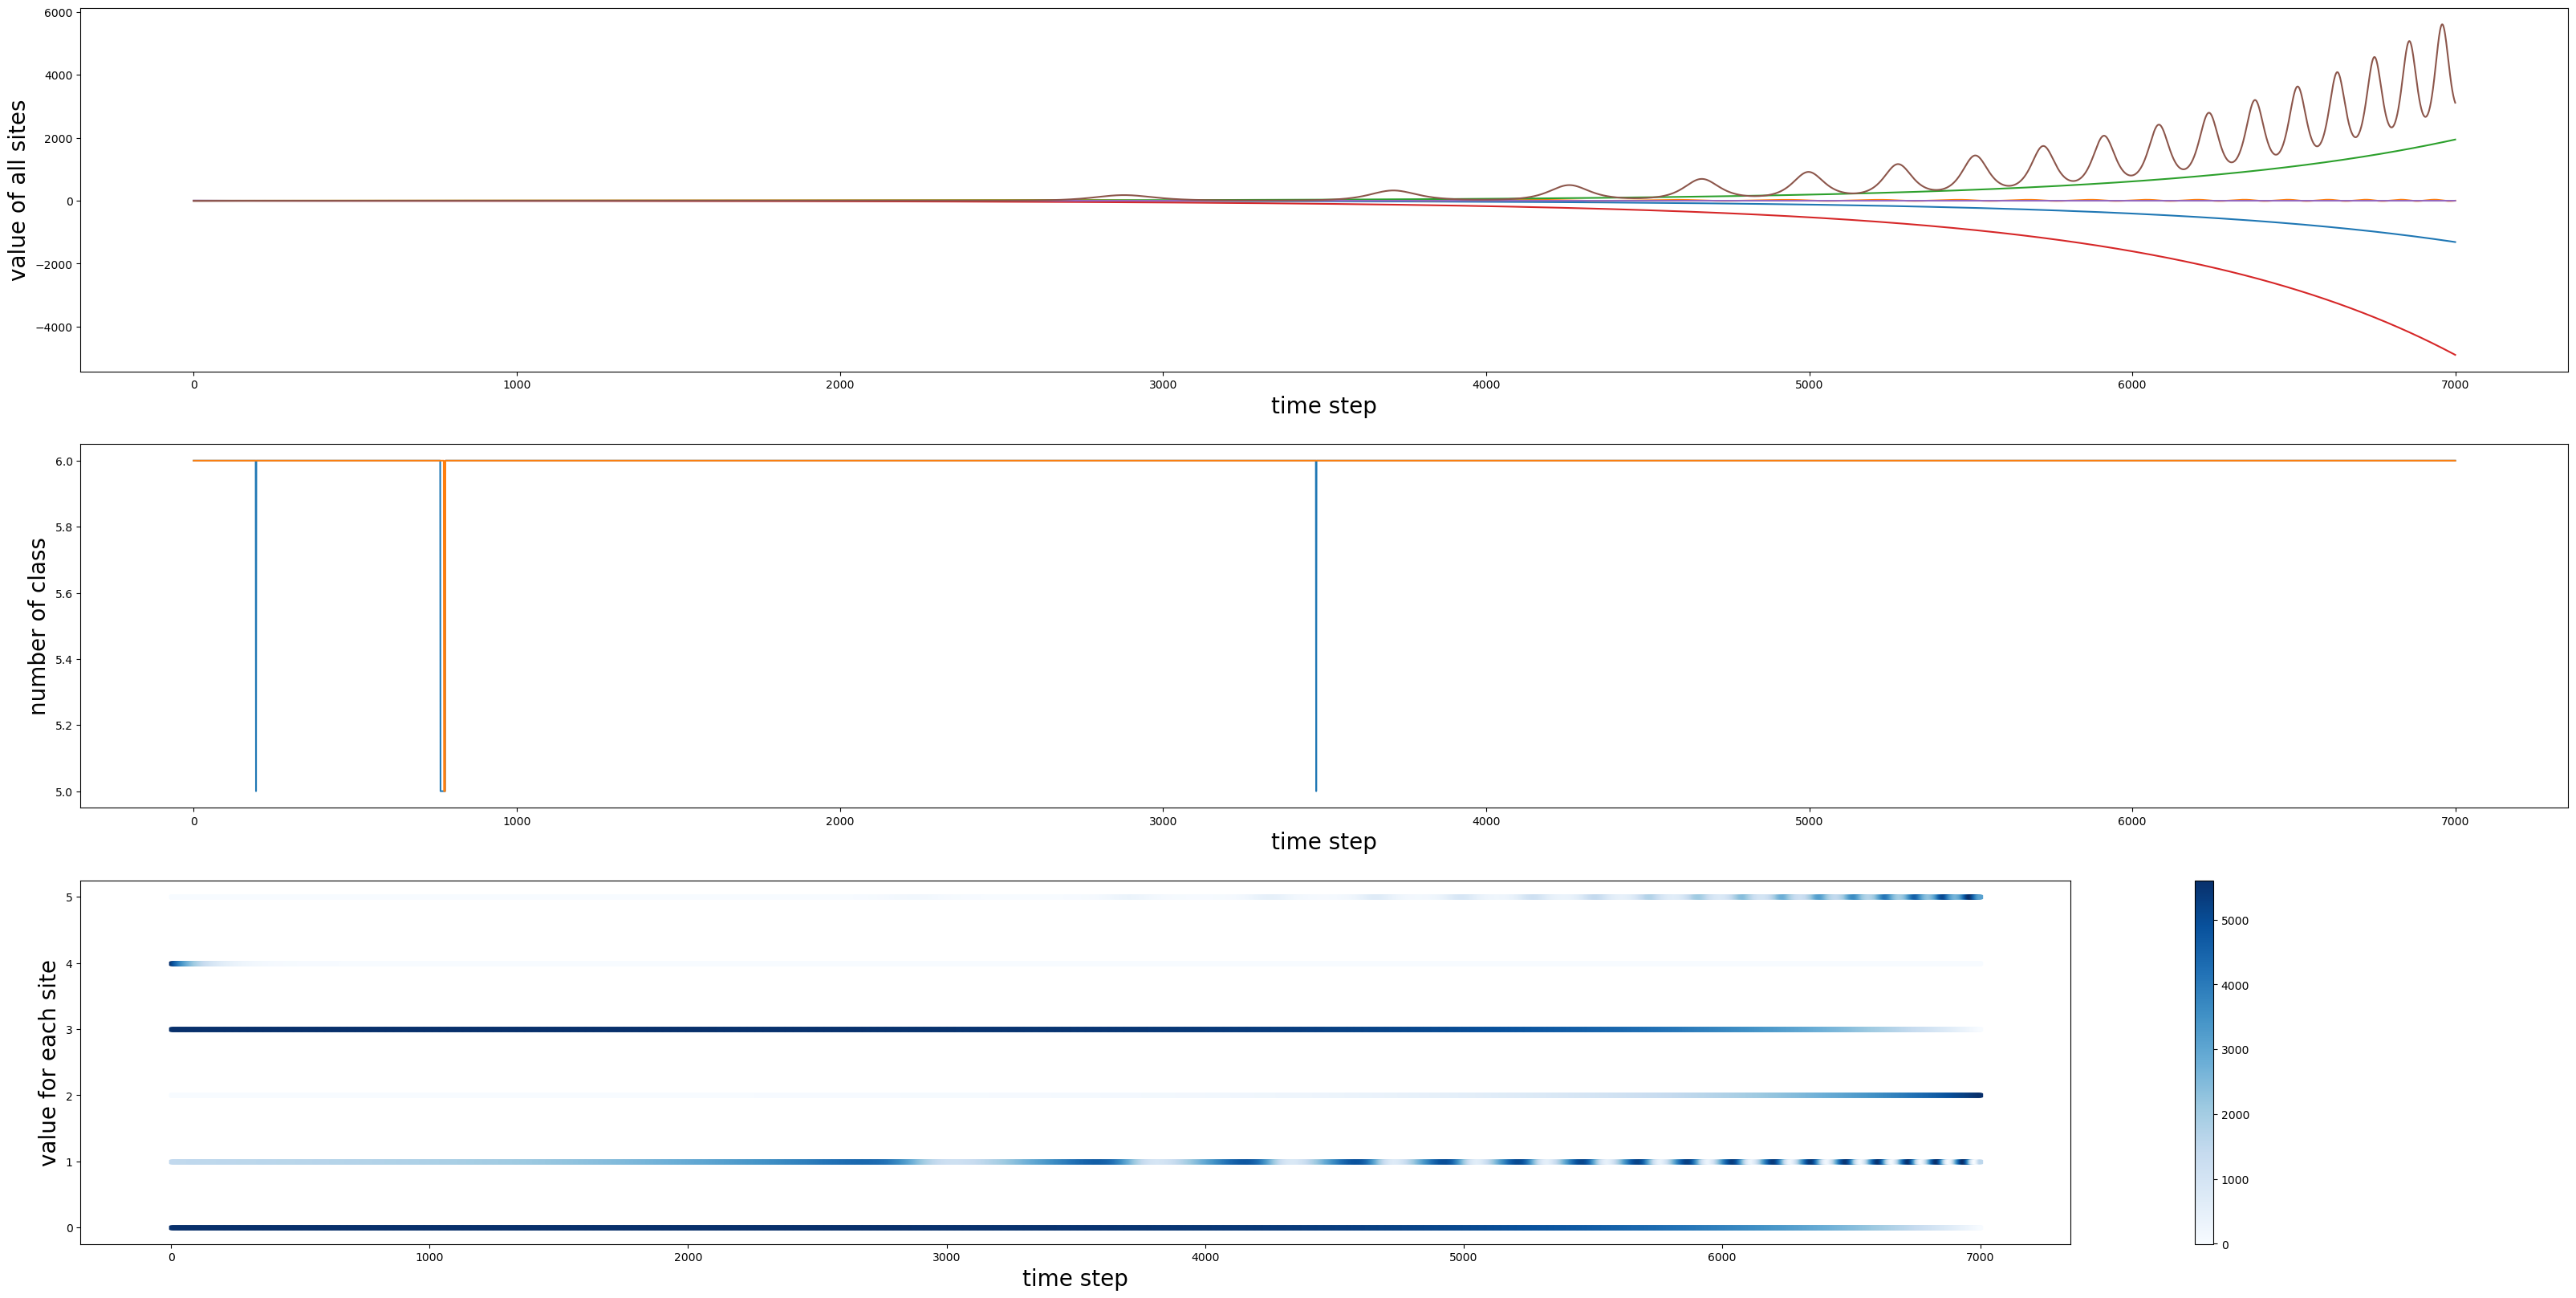

In [3]:
plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)

#図の作成指示
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(3,1)

#１つ目の図
ax1[0].set_xlabel("time step",fontsize=20)
ax1[0].set_ylabel("value of all sites",fontsize=20)  

time=np.arange(nSteps)
ax1[0].plot(time, states)

#２つ目の図 p150参照, clustering
ax1[1].set_xlabel("time step", fontsize=20)
ax1[1].set_ylabel("number of class", fontsize=20)
ax1[1].plot(time, class_numsP1)
ax1[1].plot(time, class_numsP2)

#３つ目の図
ax1[2].set_xlabel("time step",fontsize=20)
ax1[2].set_ylabel("value for each site",fontsize=20)  

for i in range(L):
  bar=ax1[2].scatter(time, np.tile(i, time.size), s=8, c=states[:,i], cmap='Blues', marker=",")
fig.colorbar(bar)

# Display plot in window
plt.show() 